Testing downloading and plotting of data.

In [1]:
import os
import sys
sys.path.append("/home/maish/OTP/ECCOv4-py")
import ecco_v4_py as ecco
from ecco_download import *
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
home = "/home/maish/OTP/ECCO"
downloads = "data/ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4"

In [3]:
ecco_podaac_download(ShortName="ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4",
                     StartDate="2000-01-08", EndDate="2000-01-14", download_root_dir="data",
                     n_workers=6, force_redownload=False)

xds = xr.open_mfdataset(f"{home}/{downloads}/*.nc", parallel=True, data_vars='minimal',\
                                  coords='minimal', compat='override')

print(xds)

created download directory data/ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4

Total number of matching granules: 7

SEA_SURFACE_HEIGHT_day_mean_2000-01-09_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-08_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-11_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-12_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-10_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-13_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-14_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|########################| 7/7 [00:00<

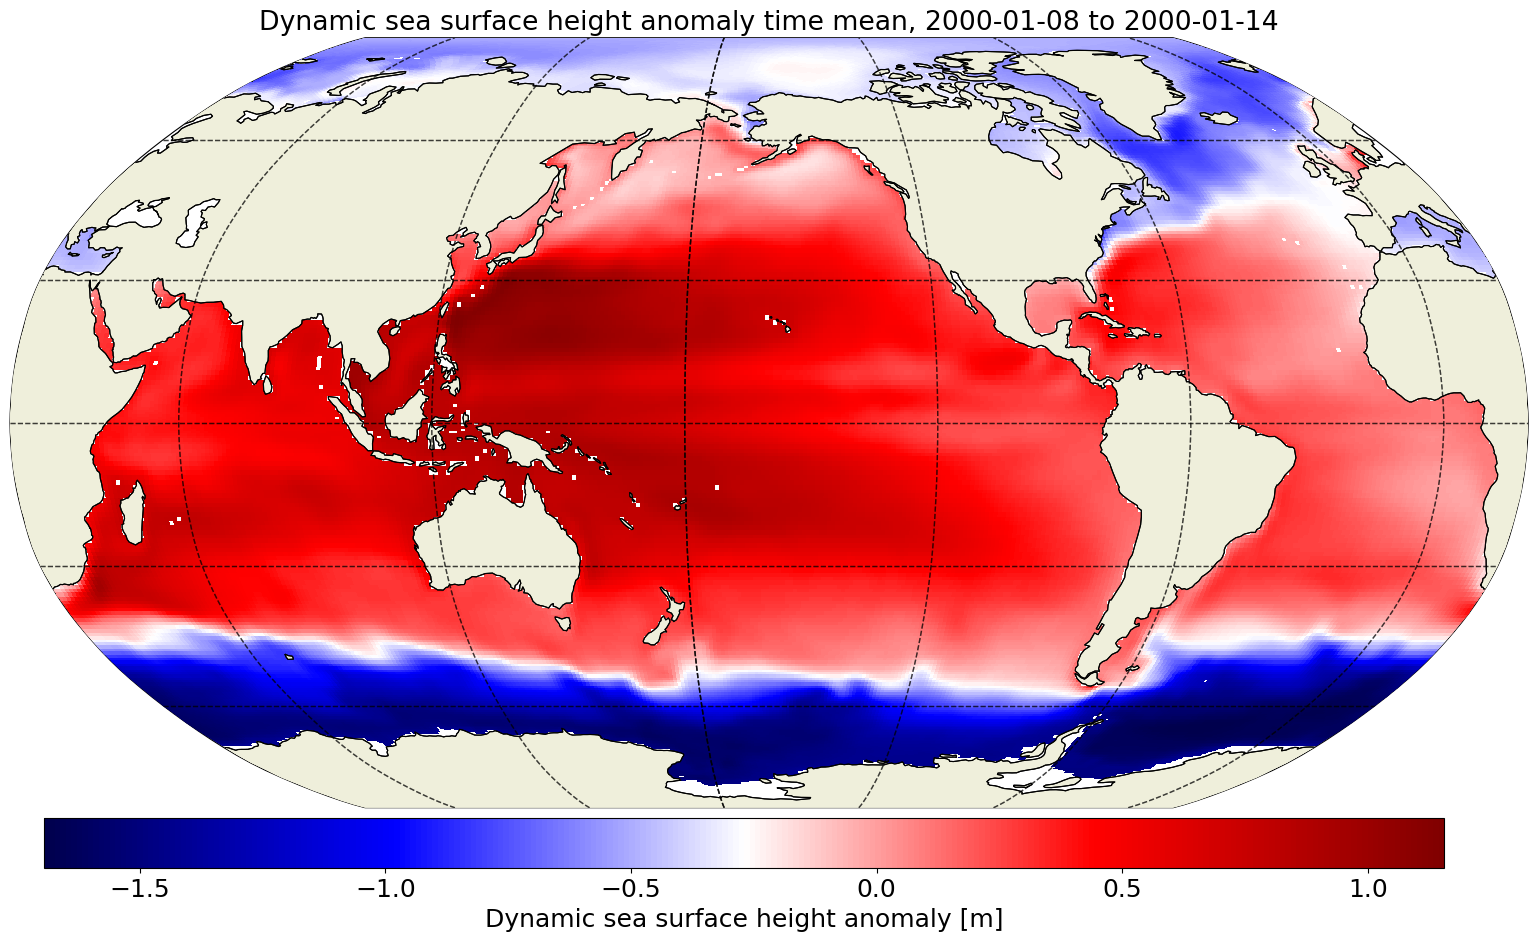

In [4]:
# select variable to plot from dataset
var_to_plot = 'SSH'
dataarray_plot = eval('xds.' + var_to_plot)

# compute the time mean over the downloaded files
time_mean = dataarray_plot.mean('time').compute()

# use ecco_v4_py function to plot native grid data on lat-lon map
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=[20,10])
time_values = dataarray_plot.time.data
title_str = dataarray_plot.long_name + ' time mean, ' + str(time_values[0])[:10] + ' to ' + str(time_values[-1])[:10]
# scalar quantities generally have coordinates XC and YC for longitude and latitude respectively
# vectors (e.g. velocities, fluxes) have different coordinates; see Coordinates tutorial for more detail
plot_obj = ecco.plot_proj_to_latlon_grid(dataarray_plot.XC, dataarray_plot.YC, time_mean, show_colorbar=False, user_lon_0=200, cmap='seismic')
plt.title(title_str)
# create horizontal colorbar with label
cax = plt.axes([0.15,0.05,0.7,0.05])
cbar = plt.colorbar(plot_obj[2],cax=cax,orientation='horizontal')
cbar.set_label(dataarray_plot.long_name + ' [' + dataarray_plot.units + ']',fontsize=18)
cax.tick_params(labelsize=18)